<a href="https://colab.research.google.com/github/kaylanelira/Modelando-Fake-News/blob/main/P2_MNC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#**Modelando a Disseminação de Fake News**

Kaylane Goncalves Lira 
kgl@cin.ufpe.br

Luan Eustaquio Lopes de Farias
lelf@cin.ufpe.br

Luan Gabriel Araujo Jardim
lgaj@cin.ufpe.br

Lucas Inojosa Mendes da Silva
lims@cin.ufpe.br

In [ ]:
# Importando bibliotecas necessárias
from inspect import GEN_CLOSED
import matplotlib.pyplot as plt
import random
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

#1) Resumo

As chamadas *Fake News* (Notícias Falsas) têm se tornado uma preocupação em todo o mundo e as redes sociais têm ampliado esse fenômeno. Esse tipo de notícia tem afetado o mundo em larga escala, já que podem ser feitas com a finalidade de influenciar as decisões da multidão em uma direção específica.

Dessa forma, o conhecimento sobre o funcionamento da disseminação de notícias falsas é de grande relevância para a sociedade moderna, fortemente baseada na internet, onde a desinformação tem mais facilidade de propagação.

O presente trabalho visa capturar a propagação de uma fake news através do tempo, identificando os principais agentes que interferem na disseminação e entendendo como as interações entre estes determina o tempo de propagação da fake news. Nesse sentido, será possível verificar a medição dos esforços necessários para sufocar uma fake news dependendo de seu estágio de divulgação.

#2) Introdução e objetivos

O termo *fake news* refere-se a informações falsas ou enganosas que aparentam ser reais. Elas têm o objetivo de enganar pessoas. Essas notícias vêm em diversas formas, como clickbaits (manchetes enganosas), desinformação (com intenção de enganar o público), rumores, entre outros, como apontado pela literatura [1].

Em 2018, o Instituto Mundial de Pesquisa (IPSO) divulgou um estudo intitulado: “[Fake news, filter bubbles, post-truth and trust](https://www.ipsos.com/sites/default/files/ct/news/documents/2018-08/fake_news-report.pdf)”, que revela dados importantes. De acordo com o levantamento, 62% dos entrevistados do Brasil admitiram ter acreditado em notícias falsas, valor acima da média mundial que é de 48%. Por consequência, a pesquisa alarmou as autoridades na procura do combate à desinformação.

Para representar o real processo de disseminação de fake news, pode-se fazer a seguinte simplificação:

1. **Condição Inicial**: Uma ou mais pessoas começam a divulgar a fake news
2. **A Expansão**: Com o passar do tempo, há um aumento no número de pessoas que vão tomando conhecimento da notícia a partir de interações com os divulgadores. Se todos os ignorantes acreditarem na fake news, automaticamente se tornarão divulgadores. Assim, em pouco tempo, todos os indivíduos tomarão conhecimento da notícia falsa sem nenhuma dificuldade na propagação.
3. **O Sufocamento**: Para aproximar o modelo da realidade, deve-se considerar que existem sufocadores que, ao entrar em contanto com a desinformação, se tornam propagadores da verdade e lutam para diminuir a quantidade de disseminadores.

Assim, utilizaremos essa organização para criar um modelo matemático com o propósito de estudar como ocorre a disseminação de fake news, buscando se aproximar de como o fenômeno ocorre na realidade. O produto dessa pesquisa procura entender o funcionamento desse cenário, o que se faz essencial na criação de futuras ferramentas de combate à desinformação, dado o impacto que ela tem na sociedade moderna.

Disseminao_de_uma_Fake_News.png

https://coggle.it/diagram/ZApiJwAjwnrfMhcl/t/-/3dcc2d657d938486780fdeb5fce6c5333b473dbf6331831ba5b83256ef88dc12

#3) Modelo

Para modelar o disseminação de fake news, é considerada uma população com três tipos de indivíduos:

1. **Disseminadores**
    - Aqueles que espalham boatos, são os responsáveis pela propagação da fake news.
2. **Ignorantes**
    - Aqueles que desconhecem o rumor, ninguém falou com eles acerca da fake news.
3. **Abafadores**
    - Aqueles que não espalham o rumor, conhecem ele, mas não espalham para os que não sabem.
4. **Esclarecedores**
    - Combatem o rumor, lutam contra a disseminação da fake news.

O objetivo deste trabalho consiste em acompanhar a variação de cada categoria de indivíduos à medida que o tempo passa. Para essa finalidade, uma simulação discreta da disseminação de fake news é realizada em vários cenários. Posteriormente, o sistema de equações (contínuo) é determinado com base em cálculos probabilísticos.

Simulador do Modelo Discreto:
---
---

Os simuladores do modelo discreto são simulações nas quais cada disseminador interage diariamente com a quantidade de indivíduos. Esses podem ser: um ignorante, outro disseminador ou um abafador. Dependendo da classe da pessoa que o disseminador entrou em contato, pode ocorrer diferentes conversões. Nessas conversões, ignorantes podem se tornar disseminadores ou disseminadores se tornar abafadores.

A seguir , será apresentado os três simuladores de disseminação de fake news, considerando as seguintes variáveis:

- *qtd:* quantidade de pessoas com as quais os disseminadores entram em contato diariamente;
- *n:* capacidade máxima de pessoas que a fake news pode alcançar;
- d: quantidade de disseminadores na população total;
- a: quantidade de abafadores na população total.

Assim, é possível criar um simulador a partir do seguinte pseudocódigo:

1. Para cada dia, repita:
    1. Escolha *d*qtd* pessoas distintas entre as *n* possíveis;
    2. Para cada pessoa escolhida, verificar a que grupo ela pertence:
        1. Se for ignorante, virará disseminadora
        2. Se for disseminadora, virará abafadora
        3. Se dor abafadora, o disseminador se tornará abafador
2. Plotar gráfico da quantidade de cada grupo no dia

Vamos atacar este problema aumentando a complexidade do Simulador a cada simulação criada.

A) Mundo onde só exitem Disseminadores e Ignorantes e as interações entre eles:

---

Considerando as seguintes interações: 

i. Disseminador-Disseminador: nada ocorre;

ii. Disseminador-Ignorante: ignorante vira um disseminador.


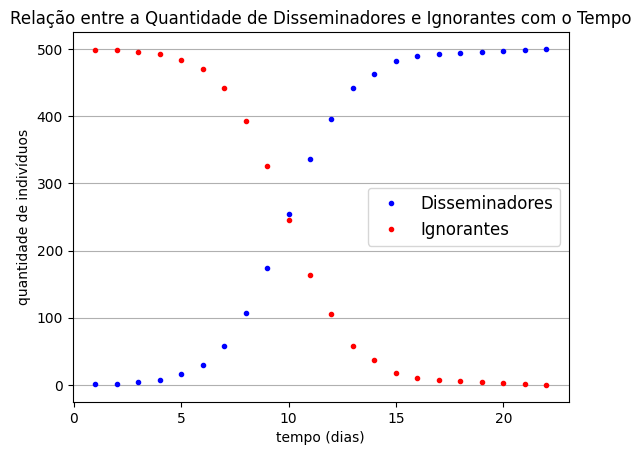

In [ ]:
# função que retorna uma lista com a quantidade pessoas distintas geradas aleatoriamente 
def generate_group(n,qtd) :
  Group = []
  for i in range(0,qtd) :
    r = random.randint(1,n+1)
    if r not in Group :
      Group.append(r)
    else :
      i-=1
  return Group

#------- condições iniciais --------
n = 500 # número de indivíduos
d = 1 # disseminadores iniciais
qtd = 1 # quantidade de pessoas escolhidas por disseminador para contar o boato
time = 1 # marcador de tempo

while d < n:
  plt.plot(time, d, 'b.') # em azul o número de disseminadores
  plt.plot(time, n-d, 'r.') # em vermelho o número de ignorantes
  Group = generate_group(n,qtd*d)
  for individuo in Group : 
    # se for ignorante , virar disseminador
    if individuo <= n-d:
      d += 1
  time += 1
plt.plot(time, d, 'b.', label='Disseminadores')
plt.plot(time, n-d, 'r.', label='Ignorantes')

plt.xlabel('tempo (dias)')
plt.ylabel('quantidade de indivíduos')
plt.grid(axis='y')
plt.legend(fontsize='large')
plt.title("Relação entre a Quantidade de Disseminadores e Ignorantes com o Tempo")

plt.show()

Como esperado, todos os ignorantes viram disseminadores sem nenhuma dificuldade, pois não há nada que se oponha à disseminação.

B) Mundo onde existem Disseminadores, Ignorantes e Abafadores e suas respectivas interações:

---

Considerando como interações possíveis: 

i. Disseminador-Disseminador: um disseminador de espalhar a fake news e vira abafador;

ii. Disseminador-Ignorante: o ignorante vira disseminador da fake news;

iii. Ignorante-Ignorante: nada ocorre.


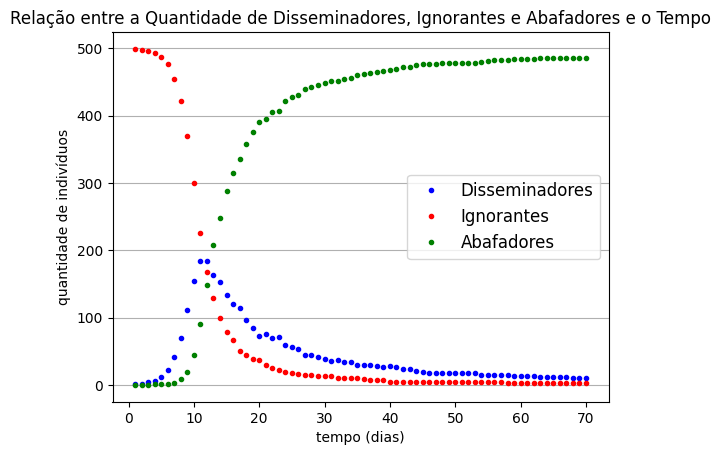

In [ ]:
#------- condições iniciais --------
n = 500 # número de indivíduos
d = 1 # disseminadores iniciais
qtd = 1 # quantidade de pessoas escolhidas por disseminador para contar o boato
time = 1 # marcador de tempo
a = 0 # neutros

while d < n and time < 70:
  plt.plot(time, d-a, 'b.') 
  plt.plot(time, n-d, 'r.') 
  plt.plot(time, a, 'g.')
  Group = generate_group(n,qtd*(d-a))
  for individuo in Group : 
    if individuo <= n-d:
      d += 1
    elif individuo <= n-a:
      a += 1
  time += 1
plt.plot(time, d-a, 'b.', label='Disseminadores')
plt.plot(time, n-d, 'r.', label='Ignorantes')
plt.plot(time, a, 'g.', label='Abafadores')

plt.xlabel('tempo (dias)')
plt.ylabel('quantidade de indivíduos')
plt.legend(fontsize='large')
plt.grid(axis='y')
plt.title("Relação entre a Quantidade de Disseminadores, Ignorantes e Abafadores e o Tempo")

plt.show()

Nesse gráfico, os disseminadores tem uma pequena subida inicial, o que causa a queda de ignorantes. Depois, através das interações entre si, param de espalhar o boato, se tornando abafadores. É possível observar que, no final desse cenário, ainda restam ignorantes que não conhecem a fake news, o que ocorre devido à diminuição de disseminadores.

C) Mundo onde existem Disseminadores, Ignorantes e Esclarecedores e suas respectivas interações:

---

Nesse caso, existem os seguintes tipos de contato:

i. Disseminador-Disseminador: nada ocorre;

ii. Disseminador-Abafadores: abafador convence o disseminador a parar de espalhar a fake news e o disseminador vira abafador;

iii. Disseminador-Ignorante: o ignorante vira disseminador da fake news.

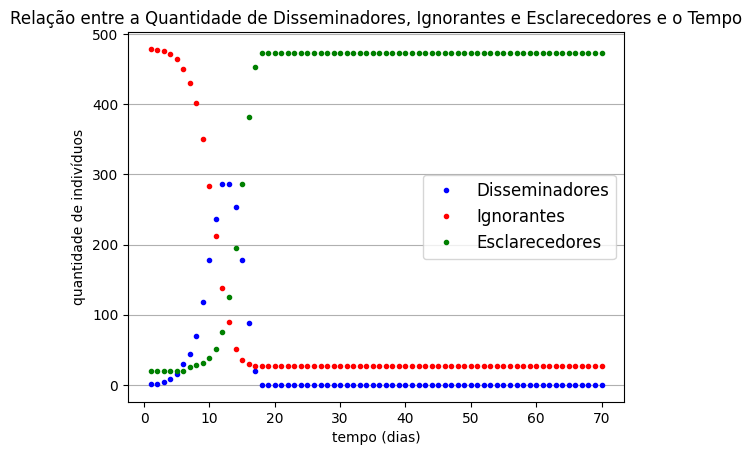

In [ ]:
#------- condições iniciais --------
n = 500 # número de indivíduos
d = 21 # disseminadores iniciais
qtd = 1 # quantidade de pessoas escolhidas por disseminador para contar o boato
time = 1 # marcador de tempo
a = 20 # esclarecedores

while d < n and time < 70:
  plt.plot(time, d-a, 'b.') # em azul o número de disseminadores
  plt.plot(time, n-d, 'r.') # em vermelho o número de ignorantes
  plt.plot(time, a, 'g.') # em verde o número de esclarecedores
  #disseminadores escolhe um grupo aleatório
  Group = generate_group(n,qtd*(d-a))
  for individuo in Group : 
    # se for ignorante, vira disseminador
    if individuo <= n-d:
      d += 1
    # se for abafador, disseminador vira abafador
    elif individuo > n-a:
      a += 1
  time += 1
plt.plot(time, d-a, 'b.', label="Disseminadores")
plt.plot(time, n-d, 'r.', label="Ignorantes")
plt.plot(time, a, 'g.', label="Esclarecedores")

plt.xlabel('tempo (dias)')
plt.ylabel('quantidade de indivíduos')
plt.legend(fontsize='large')
plt.grid(axis='y')
plt.title("Relação entre a Quantidade de Disseminadores, Ignorantes e Esclarecedores e o Tempo")

plt.show()

Considerando tais melhorias, consegue-se uma aproximação que se adequa mais à realidade. Agora, os abafadores agem contra os disseminadores, sempre que interagem, convencendo-os a impedir a disseminação da notícia.

Nesse cenário, é possível observar que há um crescimento no número de disseminadores no início da fake news. Porém, esse crescimento encontra uma barreira imposta pelos abafadores, os quais impedem que a notícia seja propagada para mais ignorantes. Por este motivo, ainda resta um número alto de ignorantes que ainda não conhecem o boato no fim da simulação.

D) Acrescentando mais interações ao modelo anterior

---

Acrecentando mais uma interação à nossa simulação anterior, conseguimos chegar ainda mais próximo do nosso modelo. Agora, a nova simulaçao é regida pelas seguintes interações:

i. Disseminador-Disseminador: um disseminador vida esclarecedor;

ii. Disseminador-Abafador: abafador convence o disseminador a parar de espalhar a fake news e o disseminador vira abafador;

iii. Disseminador-Ignorante: o ignorante vira disseminador da fake news.

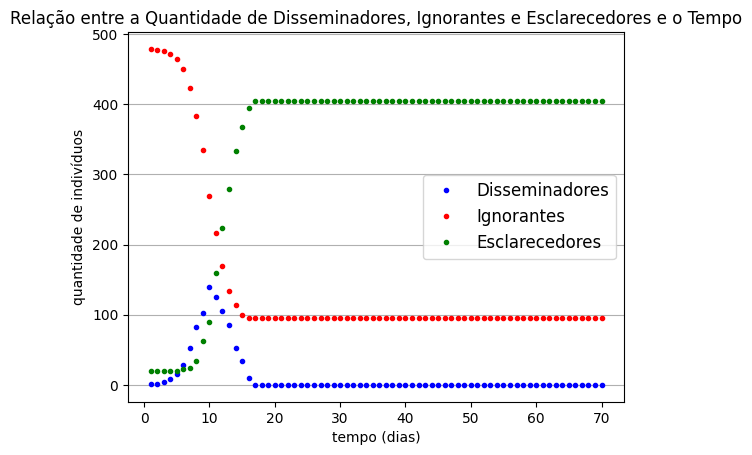

In [ ]:
#------- condições iniciais --------
n = 500 # número de indivíduos
d = 21 # disseminadores iniciais
qtd = 1 # quantidade de pessoas escolhidas por disseminador para contar o boato
time = 1 # marcador de tempo
a = 20 # abafadores

while d < n and time < 70:
  plt.plot(time, d-a, 'b.') # em azul o número de disseminadores
  plt.plot(time, n-d, 'r.') # em vermelho o número de ignorantes
  plt.plot(time, a, 'g.') # em verde o número de esclarecedores

  Group = generate_group(n,qtd*(d-a))
  for individuo in Group : 
    if individuo <= n-d:
      d += 1
    elif individuo > n-a:
      a += 1
    else:
      a += 1
  time += 1
plt.plot(time, d-a, 'b.', label="Disseminadores")
plt.plot(time, n-d, 'r.', label="Ignorantes")
plt.plot(time, a, 'g.', label="Esclarecedores")

plt.xlabel('tempo (dias)')
plt.ylabel('quantidade de indivíduos')
plt.legend(fontsize='large')
plt.grid(axis='y')
plt.title("Relação entre a Quantidade de Disseminadores, Ignorantes e Esclarecedores e o Tempo")

plt.show()

Modelo com Ignorantes, Disseminadores e Abafadores
---
---

Para formar o sistema de equação que representa o modelo de disseminação de fake news, considera-se que diariamente há $D_t$ disseminadores. Estes escolhem $D_t$ pessoas aleatórias distintas entre as N existentes. 

Assim, a quantidade de pessoas de uma classe qualquer (ignorantes ou abafadores ou disseminadores) que esses $D_t$ disseminadores encontram no dia `t` é determinada pela quantidade mais provável `E` de pessoas dessa classe com as quais os disseminadores têm contato.

Seja $x_{ct}$ a quantidade de pessoas encontradas de determinada classe entre as $D_t$ escolhidas, $x_{ct}$ é uma variável aleatória com distribuição multinomial. Portanto, a quantidade mais provável de pessoas da classe de $x_{ct}$ é dada pela expectância da distribuição multinomial:

$E(x_{ct}) = D_t*\frac{C}{N}$ 

Onde C = quantidade de pessoas da classe c

Seja `i` a classe dos ignorantes e `a` a classe dos abafadores e `d` a classe dos disseminadores. A quantidade mais provável de disseminadores no dia `t+1` é dada por:

$d_{t+1} = d_t + E(x_{it}) - E(x_{at}) - E(x_{dt})$

Consequentemente, a quantidade de abafadores e ignorantes é dada por:

$a_{t+1} = a_t + E(x_{dt}) + E(x_{at})$

$i_{t+1} = i_t - E(x_{it})$

Substituindo a expectância da distribuição multinomial para cada classe, obtém-se o seguinte sistema de equações:

$\frac{dI}{dt} = -D\frac{I}{N}$

$\frac{dD}{dt} = D\frac{I}{N} - D\frac{A}{N} - D\frac{D}{N}$

$\frac{dA}{dt} = D\frac{A}{N} + D\frac{D}{N} $

Acrescentando constantes, é possível aumentar ou diminuir a probabilidades de determinados encontros, tornando o sistema de equações diferenciais mais flexível:

$\frac{dI}{dt} = -WD\frac{I}{N}$

$\frac{dD}{dt} = WD\frac{I}{N} - UD\frac{A}{N} - KD\frac{D}{N}$

$\frac{dA}{dt} = UD\frac{A}{N} + KD\frac{D}{N} $

Portanto, este é o sistema que o presente trabalho se propõe a resolver.

Tal sistema tem simples dedução ao considerar as relações entre Disseminadores, Ignorantes ou Abafadores como produtos, visto que há, por exemplo, diversas formas de possíveis relacionamentos entre disseminadores e ignorantes num instante *t* do tempo. Para isso, basta definir se essas relações fomentam (sinal positivo) ou arrefecem (sinal negativo) a taxa de crescimento de determinado grupo, ou seja, a derivada. 

Junto a isso, faz-se o uso de constantes acompanhando essas relações, que podem ser interpretadas como a "eficiência" da relação para a taxa de crescimento do grupo.

- Usando os Disseminadores como exemplo, definimos que o crescimento desse grupo é incentivado por relações do tipo $D\frac{I}{N}$, mas quando relações do tipo  $D\frac{A}{N}$ ou $D\frac{D}{N}$ ocorrem este crescimento diminui, tendo cada uma dessas relações suas devidas constantes.

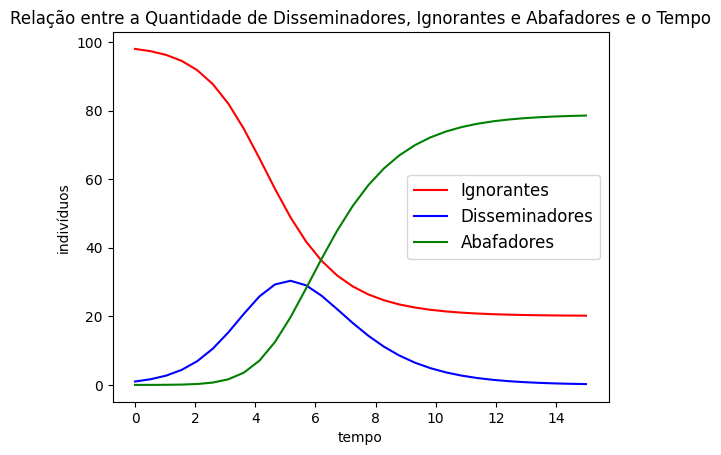

In [ ]:
#------- modelo fake news --------
def model(y, t, K, U, W):
  i, d, a = y
  dIdt = -W*d*i
  dDdt = W*d*i - U*d*a - K*d*d
  dAdt = U*d*a + K*d*d
  return dIdt, dDdt, dAdt

#------- condições iniciais --------
i0 = 98
d0 = 1
a0 = 0
y0 = i0, d0, a0

#------- constantes --------
N = i0 + d0 + a0 #população
K = 1/N #constante relacionada às relações dd
U = 1/N #constante relacionada às relações da
W = 1/N #constante relacionada às relações di

t = np.linspace(0, 15, 30)
out = odeint(model, y0, t, args=(K, U, W))
I, D, A = out.T

plt.plot(t, I, 'r-', label="Ignorantes")
plt.plot(t, D, 'b-', label="Disseminadores")
plt.plot(t, A, 'g-', label="Abafadores")
plt.xlabel('tempo')
plt.ylabel('quantidade de indivíduos')
plt.legend(fontsize='large')
plt.title("Relação entre a Quantidade de Disseminadores, Ignorantes e Abafadores e o Tempo")

plt.show()

# Modelo Aperfeiçoado

Em adição ao modelo anteriormente apresentado, apresenta-se o desenvolvimento de um modelo incrementado e melhorado que envolve todos os grupos de indivíduos explorados anteriormente, buscando modelar as relações entre eles.

Para formar o sistema de equação que representa o modelo de disseminação de fake news, considera-se que diariamente há *$D_t$* disseminadores. Estes escolhem *$D_t$* pessoas aleatórias distintas entre as *N* existentes.

As seguintes relações entre as classes foram as definidas para o modelo em questão:

- Relações envolvendo os Ignorantes:
    - Com Disseminadores, são convencidos a espalhar o rumor, resultando em menos Ignorantes.
    - Com Esclarecedores, são convencidos a ajudar a combater o rumor, resultando em menos Ignorantes.
- Relações envolvendo os Disseminadores:
    - Com Ignorantes, os convencem a espalhar o rumor, resultando em mais Disseminadores.
    - Com Esclarecedores, são convencidos a combater o rumor, resultando em menos Disseminadores.
    - Com Abafadores, se convencem que o rumor alcançou a todos e param de espalhá-lo, resultando em menos Disseminadores.
    - Com outros Disseminadores, o mesmo efeito da relação anterior, ou seja, resulta em menos Disseminadores.
- Relações envolvendo os Esclarecedores:
    - Com Ignorantes, os convencem a ajudá-los na propagação da verdade, resultando em mais Esclarecedores.
    - Com Disseminadores, mostram a eles ‘A verdade’, resultando em mais Esclarecedores.
    - Com Abafadores, acham que todos sabem da verdade, então param de propagá-la, resultando em menos Esclarecedores.
    - Com Esclarecedores, o mesmo efeito da relação anterior, resultando em menos Esclarecedores.
- Relações envolvendo os Abafadores:
    - Com Disseminadores, convencem-nos do fim do rumor, resultando em mais Abafadores.
    - Com Esclarecedores, o mesmo efeito da relação anterior, resultando em mais Abafadores.

## ODE Do Modelo Aperfeiçoado.

$\frac{dI}{dt} = -P_{id}id- P_{ie}ie$

$\frac{dD}{dt} = P_{id}id - P_{de}ed - P_ada - Pd^2$

$\frac{dA}{dt} = Pe^2 + Pd^2 + P_ada + P_aea $

$\frac{dE}{dt} = P_{ie}ie + P_{de}ed - P_aea - Pe^2 $

#Onde:
$a, e, i, d$ São as quantidades de indivíduos de cada um dos grupos.

$P_{id}$ Representa a capacidade de persuasão de Ignorantes por parte dos Disseminadores.

$P_{ie}$ Indica a capacidade de persuasão de Ignorantes por parte dos Esclarecedores.

$P_{de}$ Representa a capacidade de persuasão de Disseminadores por parte dos Esclarecedores.

$P_{a}$ Indica a capacidade de persuasão dos Abafadores.

$P$ Representa a capacidade de persuasão entre Disseminadores e entre Esclarecedores.


  - O Conjunto de equações acima, assim como o anteriormente apresentado, segue um pensamento lógico para a sua dedução.
Onde relações possíveis entre dois grupos, representadas matematicamente pelo produto entre eles, fomenta a taxa de crescimento de um dos grupos e arrefece a do outro, representado pelo sinal positivo ou negativo, respectivamente.
Além disso, temos parâmetros que acompanham cada uma das relações, podendo dificultá-las ou facilitá-las.

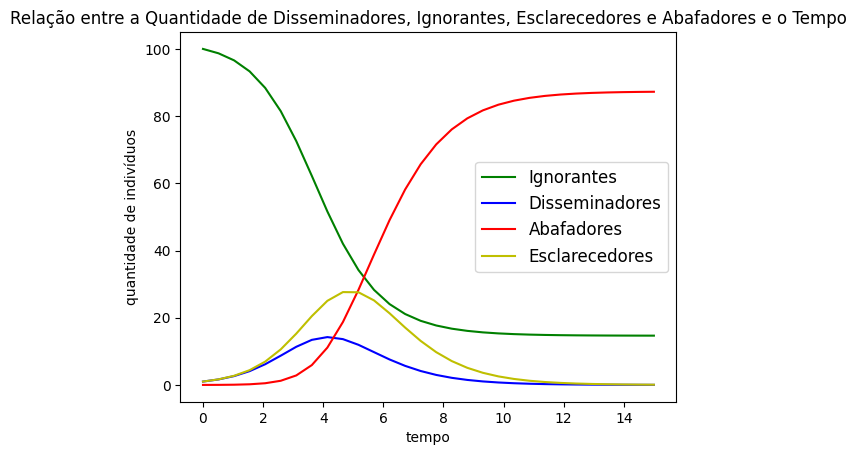

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

#------- modelo fake news --------
def model(y, t, Pid, Pie, Pde, Pa, P):
  
  i, d, a, e = y
  dIdt = -Pid*i*d - Pie*i*e
  dDdt = Pid*i*d - Pde*e*d - Pa*d*a - P*(d**2)
  dAdt = P*(e**2) + P*(d**2) + Pa*d*a + Pa*e*a
  dEdt = Pie*i*e + Pde*e*d - Pa*e*a - P*(e**2)
  return dIdt, dDdt, dAdt, dEdt

#------- condições iniciais --------
i0 = 100
d0 = 1
a0 = 0
e0 = 1
N = i0 + d0 + a0 + e0
y0 = i0, d0, a0, e0

#------- constantes --------
Pid = 1/N #constante de persuasão dos ignorantes pelos disseminadores
Pie = 1/N #constante de persuasão dos ignorantes pelos esclarecedores
Pde = 1/N #constante de persuasão dos disseminadores pelos esclarecedores
Pa = 1/N #poder de persuasão dos abafadores
P = 1/N #constante de persuasão entre 2 disseminadores ou 2 esclarecedores

t = np.linspace(0, 15, 30)
out = odeint(model, y0, t, args=(Pid, Pie, Pde, Pa, P))
I, D, A, E = out.T

plt.plot(t, I, 'g-', label='Ignorantes')
plt.plot(t, D, 'b-', label='Disseminadores')
plt.plot(t, A, 'r-', label='Abafadores')
plt.plot(t, E, 'y-', label='Esclarecedores')
plt.xlabel('tempo')
plt.ylabel('quantidade de indivíduos')
plt.legend(fontsize='large')
plt.title("Relação entre a Quantidade de Disseminadores, Ignorantes, Esclarecedores e Abafadores e o Tempo")

plt.show()

#4) Resultados e discussão

Todo modelo implementado de forma consistente deve apresentar resultados que condizem com as condições factuais da situação em análise. Assim, relacionando os gráficos gerados às características inerentes do sistema estudado:

- No plot abaixo, ao início do rumor ainda temos diversos ignorantes, o que é propício à disseminação do rumor, a quantidade de disseminadores deverá aumentar rapidamente.

- Com o passar do tempo haverá diversos disseminadores e, então, acontecerão diversos encontros entre 2 disseminadores e estes, portanto, se tornam abafadores. Com o gráfico obtido pelo modelo, é possível notar que os abafadores começam a crescer mais rapidamente quando a quantidade de disseminadores está próxima ao seu pico registrado, isto é, há uma grande probabilidade de 2 disseminadores se encontrarem.

- A partir desse ponto, com o surgimento de diversos abafadores, a existência dos disseminadores é desafiada. Os abafadores, que agora se encontram em quantidade, passam a consumir os disseminadores que não conseguem se manter pela falta de ignorantes, quando comparados com abafadores, e tendem a desaparecer.

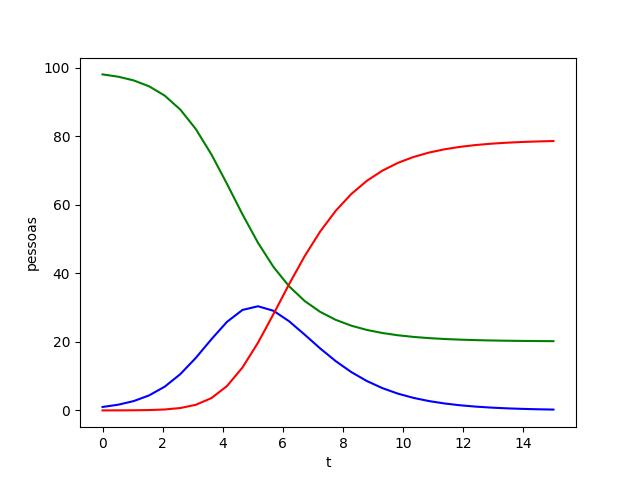

É interessante apontar que nem todos os indivíduos da população sabem sobre o rumor no fim do tempo observado. Ainda existem ignorantes, o que implica que os disseminadores não conseguiram "contar rapidamente" o rumor, antes que os abafadores ganhassem força.

Desta forma, ao aumentar "a facilidade de propagação" do rumor, aumentando a constante W para 2 e diminuindo K e U para 0.5, o seguinte resultado é gerado:

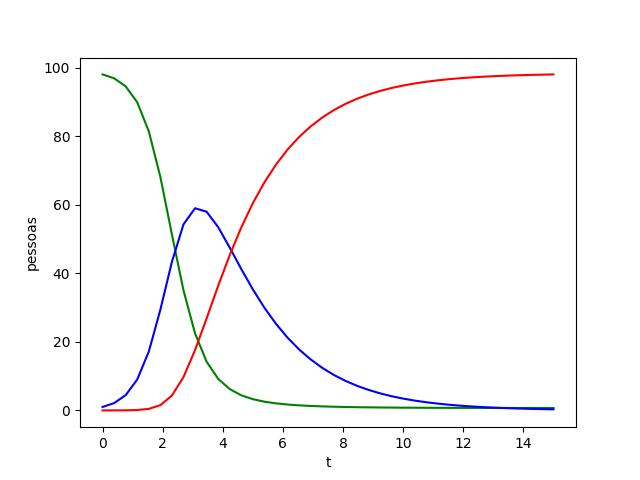

Neste momento, os disseminadores conseguem espalhar o rumor com maior eficência e, desta vez, consumir todos os ignorantes. É visto um mundo onde toda a população ficou sabendo do rumor e que, com o tempo, pararam de propagá-lo, pois já não haviam mais ignorantes para ouvir sobre o rumor.

No próximo gráfico, a propagação do rumor é dificultada, diminuindo a constante W para 0.5 e mantendo K e U em 1, resultando em um "achatamento" da curva obtida na primeira situação. Neste, os disseminadores nunca alcançam grandes quantidades, mas em troca conseguem permanecer por mais tempo "existindo", o que faz a curva se achatar e o tempo até a estabilidade do sistema aumentar, mais dias serão necessários até que o rumor pare de ser espalhado.

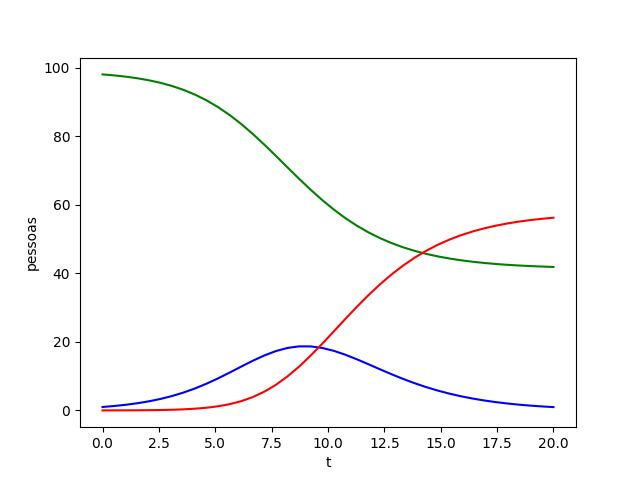

## Análise do Modelo Aperfeiçoado

Para a análise do modelo aperfeiçoado, apresenta-se o seguinte gráfico com a modificação de parâmetros referentes às relações entre os grupos do modelo.

### Variação da Persuasão de Ignorantes por Disseminadores

Ao variar o parâmetro que rege as relações entre os Ignorantes os Disseminadores, temos o seguinte gráfico:


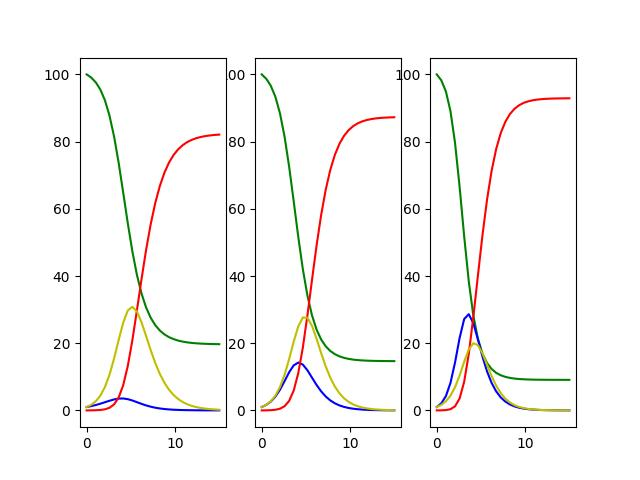


No gráfico à esquerda, dificulta-se a propagação do boato, diminuindo Pid para ${{0.5}/{N}}$, por Disseminadores para ignorantes, já à direita, há o aumento da capacidade de espalhar o boato. O gráfico do centro mantém o parâmetro original.

Nesse sentido, pode-se observar que o resultado obtido demonstra o que seria esperado do comportamento dos disseminadores, achatando  ou alongando sua curva, além de explicitar como os Ignorantes terminaram a simulação em maior número para o caso em que os Disseminadores não cresceram o suficiente.

### Variação da Persuasão de Disseminadores por Esclarecedores

Agora, os resultados obtidos quando varia-se o parâmetro que rege as relações entre Esclarecedores e Disseminadores, assim como no exemplo anterior, aumentando Pde para $1.5/N$ à direita e diminuindo-o para $0.5/N$ à esquerda.

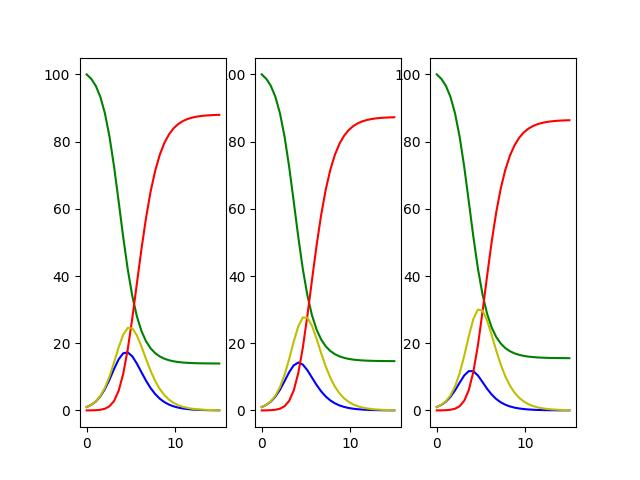

Novamente, são obtidos resultados satisfatórios, nos quais é possível perceber a quantidade de Disseminadores diminuindo e se afastando da quantidade de Esclarecedores à medida em que se aumenta a probabilidade de uma relação entre os dois grupos.

### Variação da Persuasão de Ignorantes por Esclarecedores

Seguindo o padrão de ir aumentando o parâmetro da esquerda para a direita, Pie varia entre $0.5/N$ e $1.5/N$ tem-se o resultado ao variar o parâmetro que governa a relação de Ignorantes e Esclarecedores:


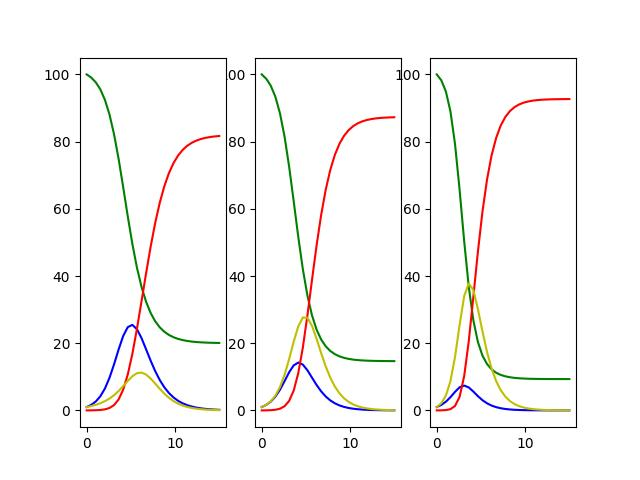

A visualização em forma de gráfico torna explícito que os Esclarecedores crescem conforme o parâmetro é aumentado, como esperado. Entretanto, é importante notar que os Disseminadores diminuem, devido ao rápido consumo dos Ignorantes pelos Esclarecedores. Isso torna os Ignorantes escassos e dificulta a relação deles com os Disseminadores, levando a um desaparecimento precoce dos últimos.

### Variação da Persuasão de Ignorantes e Esclarecedores por Abafadores

Assim, variando um parâmetro que influencia ao mesmo entre 3 grupos diferentes, a relação entre Abafadores-Disseminadores e Abafadores-Esclarecedores.

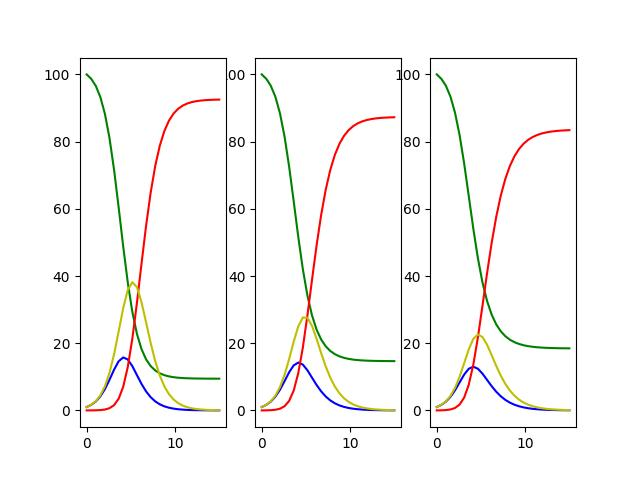

Com base no gráfico acima, é possível perceber que ele segue o que seria esperado. À medida em que aumentamos o parâmetro Pa, de $0.5/N$ a $1.5/N$, tanto os Abafadores quanto os Disseminadores têm seu crescimento impedido. Além disso, é evidente que a quantidade final de Ignorantes aumenta, uma vez que eles terão, consequentemente, uma menor quantidade de relação com Disseminadores ou Esclarecedores.

### Variação da Persuasão de Ignorantes por Disseminadores e de Disseminadores por Esclarecedores

Para a última análise do modelo desenvolvido, foi realizada uma configuração de variação de dois parâmetros em conjunto, nos quais ambos influenciam diretamente a taxa de crescimento dos Disseminadores. Com Pid variando de $1.5/N$ a $0.5/N$ e Pde de $0.5/N$ a $1.5/N$.

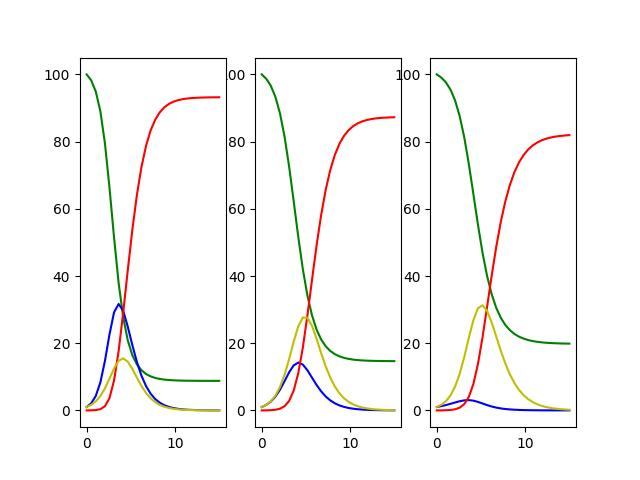


Ao diminuir a persuasão dos Ignorantes pelos Disseminadores e aumentar a persuasão dos Disseminadores pelos Esclarecedores, da esquerda para a direita, estamos tornando cada vez mais difícil a propagação dos Disseminadores. Isso foi factualmente comprovado pelo modelo, no qual, inicialmente, foram definidos parâmetros favoráveis ao surgimento dos Disseminadores, o que resultou em uma redução abrupta dos Ignorantes. Conforme aumentamos essa dificuldade de reprodução dos Disseminadores, percebemos que eles nunca assumem valores de alta relevância, permanecendo quase nulos durante a maior parte do tempo.

#5) Conclusão

Em um mundo cada vez mais interconectado, a propagação de fake news pode causar danos significativos, disseminando informações falsas e imprecisas. Nesse sentido, uma modelagem eficaz de disseminação de fake news pode ajudar a entender como as notícias falsas se espalham e desenvolver estratégias para combatê-las.

O modelo de disseminação de fake news apresentado no presente trabalho é baseado na ideia de contágio social, que descreve a propagação de uma informação falsa de pessoa para pessoa. Tal modelo assume que a disseminação de notícias falsas é semelhante à disseminação de uma doença contagiosa e é influenciada por fatores como o tamanho população que pode ser contagiada e a probabilidade das pessoas acreditarem na informação.

Para desenvolver um modelo eficaz, foram considerados os principais fatores que remetem a realidade, como a rapidez com que os espalhadores de notícias falsas agem, e também a existência de uma parcela da população que prefere combater ou abafar a propagação de notícias falsas, muitas vezes devido a crenças pessoais ou ideológicas.

Em resumo, o modelo de disseminação exposto é uma ferramenta versátil e eficaz para entender como as informações falsas se espalham entre as pessoas em um ambiente interconectado. Ao considerar fatores como o tamanho da população exposta e a probabilidade de as pessoas acreditarem nas notícias falsas, o modelo pode ser utilizado em diferentes contextos e meios de comunicação para desenvolver estratégias eficazes de combate à disseminação de informações falsas.

# Referências

[1] Brian Winkel (2017), "2013-Fedewa, Nick , Emily Krause, and Alexandra Sisson - Spread of a Rumor. Class Project.," https://www.simiode.org/resources/4143.

[2] Zhou, X., Zafarani, R.: A survey of fake news: fundamental theories, detection methods, and opportunities. ACM Comput. Surv. (2020). https://doi.org/10.1145/3395046